# 1. Importing Libraries

In [1]:
# Importting all required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import timedelta
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. Reading Data Set

In [2]:
# Reading First csv containing application records

application_record = pd.read_csv("application_record.csv")

In [3]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
application_record.shape

(438557, 18)

In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# Reading Second csv containing credit records

credit_record = pd.read_csv("credit_record.csv")

In [7]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
credit_record.shape

(1048575, 3)

In [9]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
# Merging application records and application records into one data frame

data = application_record.merge(credit_record,how = 'inner',on = ['ID'])

In [11]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [12]:
data.shape

(777715, 20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

# 3. Data Exploration

In [14]:
# Checking categorical variables in the dataframe

data_cat = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(data_cat)))
print('Categorical Variables are :', data_cat)

There are 9 categorical variables in Data 

Categorical Variables are : ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']


In [15]:
# Checking numerical variables in the dataframe

data_num = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} categorical variables in Data \n'.format(len(data_num)))
print('Categorical Variables are :', data_num)

There are 11 categorical variables in Data 

Categorical Variables are : ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE']


In [16]:
# Total number of columns

print("The total number of Columns in Data are :", len(data.columns))

The total number of Columns in Data are : 20


## 3.1 Univariate Analysis

### 3.1.1 Categorical Variables in Data

#### 3.1.1.1 CODE_GENDER

In [17]:
# Number of null values and unique values in Gender

print("Null Value in Gender :", data['CODE_GENDER'].isnull().sum())
print("Number of Unique Values in Gender :", data['CODE_GENDER'].nunique())

Null Value in Gender : 0
Number of Unique Values in Gender : 2


In [18]:
data['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [19]:
print("Number of Male and Females in Gender are :\n", data['CODE_GENDER'].value_counts())

Number of Male and Females in Gender are :
 F    518851
M    258864
Name: CODE_GENDER, dtype: int64


In [20]:
# Percentage of Males and Females in Gender

countMale = len(data[data.CODE_GENDER == 'M'])
countFemale = len(data[data.CODE_GENDER == 'F'])
countNull = len(data[data.CODE_GENDER.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.CODE_GENDER)))*100))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.CODE_GENDER)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.CODE_GENDER)))*100))

Percentage of Male applicant: 33.29%
Percentage of Female applicant: 66.71%
Missing values percentage: 0.00%


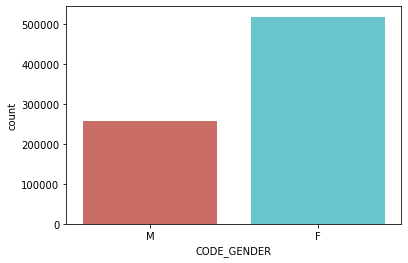

In [21]:
# Plotting count of Males and Females

sns.countplot(x = "CODE_GENDER", data = data, palette = "hls")
plt.show()

#### 3.1.1.2 FLAG_OWN_CAR

In [22]:
# Number of null values and unique values in FLAG_OWN_CAR

print("Null Value in FLAG_OWN_CAR :", data['FLAG_OWN_CAR'].isnull().sum())
print("Number of Unique Values in FLAG_OWN_CAR :", data['FLAG_OWN_CAR'].nunique())

Null Value in FLAG_OWN_CAR : 0
Number of Unique Values in FLAG_OWN_CAR : 2


In [23]:
data['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
print("Number of Yes and No in FLAG_OWN_CAR are :\n", data['FLAG_OWN_CAR'].value_counts())

Number of Yes and No in FLAG_OWN_CAR are :
 N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64


In [25]:
# Percentage of Yes and No in FLAG_OWN_CAR

countYesCar = len(data[data.FLAG_OWN_CAR == 'Y'])
countNoCar = len(data[data.FLAG_OWN_CAR == 'N'])
countNull = len(data[data.FLAG_OWN_CAR.isnull()])

print("Percentage of Yes: {:.2f}%".format((countYesCar / (len(data.FLAG_OWN_CAR)))*100))
print("Percentage of No: {:.2f}%".format((countNoCar/ (len(data.FLAG_OWN_CAR)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.FLAG_OWN_CAR)))*100))

Percentage of Yes: 39.14%
Percentage of No: 60.86%
Missing values percentage: 0.00%


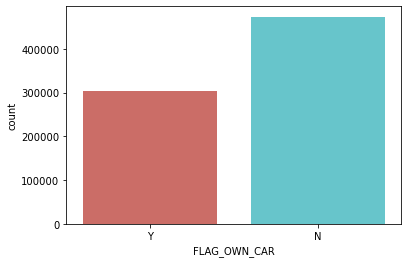

In [26]:
# Plotting count of Yes and No in FLAG_OWN_CAR

sns.countplot(x = "FLAG_OWN_CAR", data = data, palette = "hls")
plt.show()

#### 3.1.1.3 FLAG_OWN_REALTY

In [27]:
# Number of null values and unique values in FLAG_OWN_REALTY

print("Null Value in FLAG_OWN_REALTY :", data['FLAG_OWN_REALTY'].isnull().sum())
print("Number of Unique Values in FLAG_OWN_REALTY :", data['FLAG_OWN_REALTY'].nunique())

Null Value in FLAG_OWN_REALTY : 0
Number of Unique Values in FLAG_OWN_REALTY : 2


In [28]:
data['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
print("Number of Yes and No in FLAG_OWN_REALTY are :\n", data['FLAG_OWN_REALTY'].value_counts())

Number of Yes and No in FLAG_OWN_REALTY are :
 Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64


In [30]:
# Percentage of Yes and No in FLAG_OWN_REALTY

countYesRealty = len(data[data.FLAG_OWN_REALTY == 'Y'])
countNoRealty = len(data[data.FLAG_OWN_REALTY == 'N'])
countNull = len(data[data.FLAG_OWN_REALTY.isnull()])

print("Percentage of Yes: {:.2f}%".format((countYesRealty / (len(data.FLAG_OWN_REALTY)))*100))
print("Percentage of No: {:.2f}%".format((countNoRealty/ (len(data.FLAG_OWN_REALTY)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.FLAG_OWN_REALTY)))*100))

Percentage of Yes: 65.96%
Percentage of No: 34.04%
Missing values percentage: 0.00%


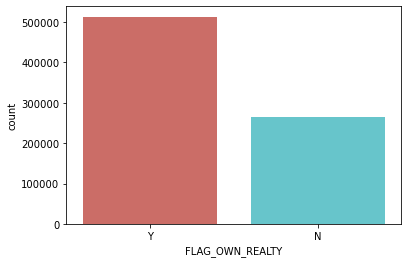

In [31]:
# Plotting count of Yes and No in FLAG_OWN_REALTY

sns.countplot(x = "FLAG_OWN_REALTY", data = data, palette = "hls")
plt.show()

#### 3.1.1.4 NAME_INCOME_TYPE

In [32]:
# Number of null values and unique values in NAME_INCOME_TYPE

print("Null Value in NAME_INCOME_TYPE :", data['NAME_INCOME_TYPE'].isnull().sum())
print("Number of Unique Values in NAME_INCOME_TYPE :", data['NAME_INCOME_TYPE'].nunique())

Null Value in NAME_INCOME_TYPE : 0
Number of Unique Values in NAME_INCOME_TYPE : 5


In [33]:
data['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [34]:
print("Count of Job Types are :\n", data['NAME_INCOME_TYPE'].value_counts())

Count of Job Types are :
 Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64


In [35]:
# Percentage of Job Types

countWorking = len(data[data.NAME_INCOME_TYPE == 'Working'])
countCommercial = len(data[data.NAME_INCOME_TYPE == 'Commercial associate'])
countPensioner = len(data[data.NAME_INCOME_TYPE == 'Pensioner'])
countState_servant = len(data[data.NAME_INCOME_TYPE == 'State servant'])
countStudent = len(data[data.NAME_INCOME_TYPE == 'Student'])
countNull = len(data[data.NAME_INCOME_TYPE.isnull()])

print("Percentage of Working: {:.2f}%".format((countWorking / (len(data.NAME_INCOME_TYPE)))*100))
print("Percentage of Commercial associate: {:.2f}%".format((countCommercial/ (len(data.NAME_INCOME_TYPE)))*100))
print("Percentage of Pensioner: {:.2f}%".format((countPensioner / (len(data.NAME_INCOME_TYPE)))*100))
print("Percentage of State servant: {:.2f}%".format((countState_servant / (len(data.NAME_INCOME_TYPE)))*100))
print("Percentage of Student: {:.2f}%".format((countStudent / (len(data.NAME_INCOME_TYPE)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.NAME_INCOME_TYPE)))*100))

Percentage of Working: 51.45%
Percentage of Commercial associate: 23.58%
Percentage of Pensioner: 16.51%
Percentage of State servant: 8.41%
Percentage of Student: 0.04%
Missing values percentage: 0.00%


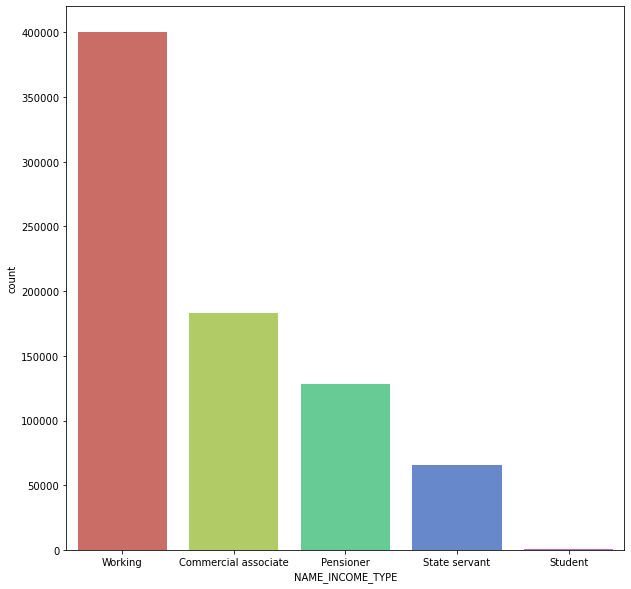

In [36]:
# Plotting count of Job types

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "NAME_INCOME_TYPE", data = data, palette = "hls")
plt.show()

#### 3.1.1.5 NAME_EDUCATION_TYPE

In [37]:
# Number of null values and unique values in NAME_EDUCATION_TYPE

print("Null Value in NAME_EDUCATION_TYPE :", data['NAME_EDUCATION_TYPE'].isnull().sum())
print("Number of Unique Values in NAME_EDUCATION_TYPE :", data['NAME_EDUCATION_TYPE'].nunique())

Null Value in NAME_EDUCATION_TYPE : 0
Number of Unique Values in NAME_EDUCATION_TYPE : 5


In [38]:
data['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [39]:
# Changing Name Secondary / secondary special to Secondary

data.loc[data['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special','NAME_EDUCATION_TYPE'] = 'Secondary'

In [40]:
print("Count of Education levels are :\n", data['NAME_EDUCATION_TYPE'].value_counts())

Count of Education levels are :
 Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64


In [41]:
# Percentage of Education levels

countSecondary = len(data[data.NAME_EDUCATION_TYPE == 'Secondary'])
countHigher = len(data[data.NAME_EDUCATION_TYPE == 'Higher education'])
countIncomplete = len(data[data.NAME_EDUCATION_TYPE == 'Incomplete higher'])
countLower = len(data[data.NAME_EDUCATION_TYPE == 'Lower secondary'])
countDegree = len(data[data.NAME_EDUCATION_TYPE == 'Academic degree'])
countNull = len(data[data.NAME_EDUCATION_TYPE.isnull()])

print("Percentage of Secondary: {:.2f}%".format((countSecondary / (len(data.NAME_EDUCATION_TYPE)))*100))
print("Percentage of Higher education: {:.2f}%".format((countHigher/ (len(data.NAME_EDUCATION_TYPE)))*100))
print("Percentage of Incomplete higher: {:.2f}%".format((countIncomplete / (len(data.NAME_EDUCATION_TYPE)))*100))
print("Percentage of Lower secondary: {:.2f}%".format((countLower / (len(data.NAME_EDUCATION_TYPE)))*100))
print("Percentage of Academic degree: {:.2f}%".format((countDegree / (len(data.NAME_EDUCATION_TYPE)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.NAME_EDUCATION_TYPE)))*100))

Percentage of Secondary: 67.41%
Percentage of Higher education: 27.47%
Percentage of Incomplete higher: 3.90%
Percentage of Lower secondary: 1.11%
Percentage of Academic degree: 0.11%
Missing values percentage: 0.00%


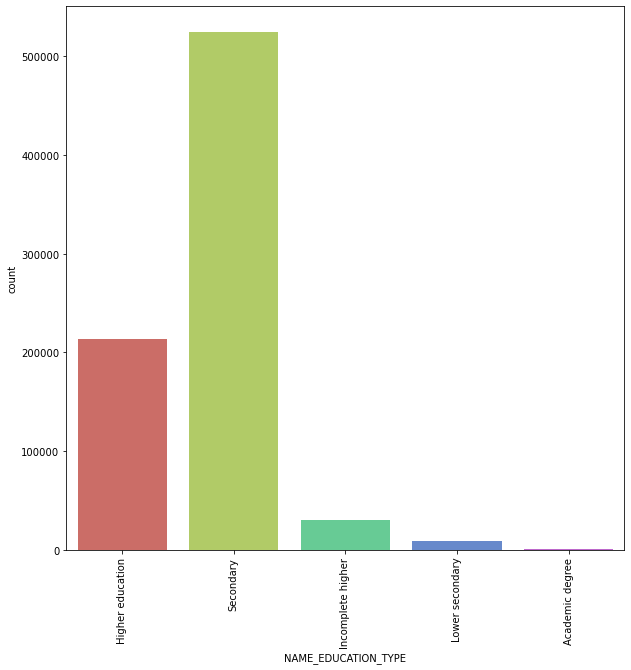

In [42]:
# Plotting count of Education types

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "NAME_EDUCATION_TYPE", data = data, palette = "hls")
plt.xticks(rotation=90)
plt.show()

#### 3.1.1.6 NAME_FAMILY_STATUS

In [43]:
# Number of null values and unique values in NAME_FAMILY_STATUS

print("Null Value in NAME_FAMILY_STATUS :", data['NAME_FAMILY_STATUS'].isnull().sum())
print("Number of Unique Values in NAME_FAMILY_STATUS :", data['NAME_FAMILY_STATUS'].nunique())

Null Value in NAME_FAMILY_STATUS : 0
Number of Unique Values in NAME_FAMILY_STATUS : 5


In [44]:
data['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [45]:
# Changing Name Single / not married to Single

data.loc[data['NAME_FAMILY_STATUS'] == 'Single / not married','NAME_FAMILY_STATUS'] = 'Single'

In [46]:
print("Count of Family Status :\n", data['NAME_FAMILY_STATUS'].value_counts())

Count of Family Status :
 Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: NAME_FAMILY_STATUS, dtype: int64


In [47]:
# Percentage of Family Status

countMarried = len(data[data.NAME_FAMILY_STATUS == 'Married'])
countSingle = len(data[data.NAME_FAMILY_STATUS == 'Single'])
countCivil = len(data[data.NAME_FAMILY_STATUS == 'Civil marriage'])
countSeparated = len(data[data.NAME_FAMILY_STATUS == 'Separated'])
countWidow = len(data[data.NAME_FAMILY_STATUS == 'Widow'])
countNull = len(data[data.NAME_FAMILY_STATUS.isnull()])

print("Percentage of Married: {:.2f}%".format((countMarried / (len(data.NAME_FAMILY_STATUS)))*100))
print("Percentage of Single: {:.2f}%".format((countSingle/ (len(data.NAME_FAMILY_STATUS)))*100))
print("Percentage of Civil marriage: {:.2f}%".format((countCivil / (len(data.NAME_FAMILY_STATUS)))*100))
print("Percentage of Separated: {:.2f}%".format((countSeparated / (len(data.NAME_FAMILY_STATUS)))*100))
print("Percentage of Widow: {:.2f}%".format((countWidow / (len(data.NAME_FAMILY_STATUS)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.NAME_FAMILY_STATUS)))*100))

Percentage of Married: 70.29%
Percentage of Single: 12.13%
Percentage of Civil marriage: 7.76%
Percentage of Separated: 5.82%
Percentage of Widow: 4.01%
Missing values percentage: 0.00%


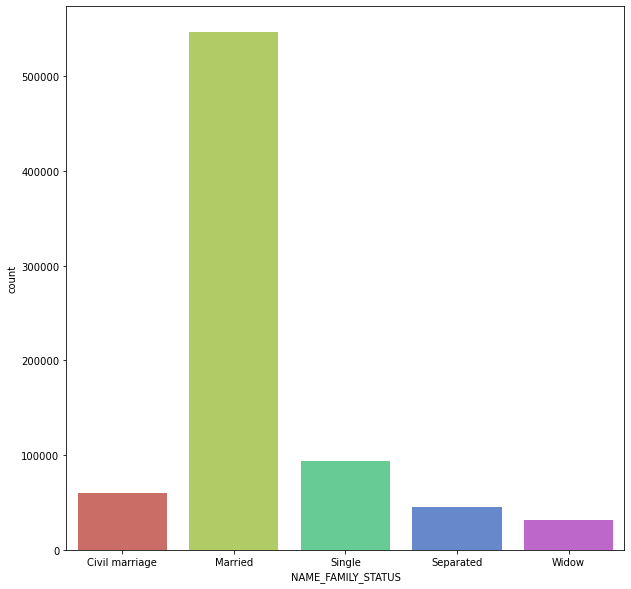

In [48]:
# Plotting count of Family Status

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "NAME_FAMILY_STATUS", data = data, palette = "hls")
plt.show()

#### 3.1.1.7 NAME_HOUSING_TYPE

In [49]:
# Number of null values and unique values in NAME_HOUSING_TYPE

print("Null Value in NAME_HOUSING_TYPE :", data['NAME_HOUSING_TYPE'].isnull().sum())
print("Number of Unique Values in NAME_HOUSING_TYPE :", data['NAME_HOUSING_TYPE'].nunique())

Null Value in NAME_HOUSING_TYPE : 0
Number of Unique Values in NAME_HOUSING_TYPE : 6


In [50]:
data['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [51]:
# Changing Name House / apartment to House

data.loc[data['NAME_HOUSING_TYPE'] == 'House / apartment','NAME_HOUSING_TYPE'] = 'House'

In [52]:
print("Count of Housing types :\n", data['NAME_HOUSING_TYPE'].value_counts())

Count of Housing types :
 House                  697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64


In [53]:
# Percentage of Housing types

countHouse = len(data[data.NAME_HOUSING_TYPE == 'House'])
countParents = len(data[data.NAME_HOUSING_TYPE == 'With parents'])
countMunicipal = len(data[data.NAME_HOUSING_TYPE == 'Municipal apartment'])
countRented = len(data[data.NAME_HOUSING_TYPE == 'Rented apartment'])
countOffice = len(data[data.NAME_HOUSING_TYPE == 'Office apartment'])
countCo = len(data[data.NAME_HOUSING_TYPE == 'Co-op apartment'])
countNull = len(data[data.NAME_HOUSING_TYPE.isnull()])

print("Percentage of House: {:.2f}%".format((countHouse / (len(data.NAME_HOUSING_TYPE)))*100))
print("Percentage of With parents: {:.2f}%".format((countParents/ (len(data.NAME_HOUSING_TYPE)))*100))
print("Percentage of Municipal apartment: {:.2f}%".format((countMunicipal / (len(data.NAME_HOUSING_TYPE)))*100))
print("Percentage of Rented apartment: {:.2f}%".format((countRented / (len(data.NAME_HOUSING_TYPE)))*100))
print("Percentage of Office apartment: {:.2f}%".format((countOffice / (len(data.NAME_HOUSING_TYPE)))*100))
print("Percentage of Co-op apartment: {:.2f}%".format((countCo / (len(data.NAME_HOUSING_TYPE)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.NAME_HOUSING_TYPE)))*100))

Percentage of House: 89.64%
Percentage of With parents: 4.59%
Percentage of Municipal apartment: 3.17%
Percentage of Rented apartment: 1.40%
Percentage of Office apartment: 0.72%
Percentage of Co-op apartment: 0.47%
Missing values percentage: 0.00%


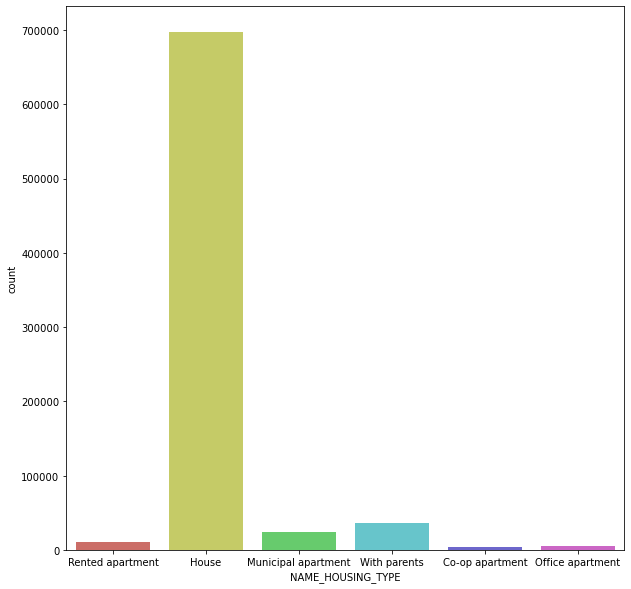

In [54]:
# Plotting count of Housing types

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "NAME_HOUSING_TYPE", data = data, palette = "hls")
plt.show()

#### 3.1.1.8 OCCUPATION_TYPE

In [55]:
# Number of null values and unique values in OCCUPATION_TYPE

print("Null Value in OCCUPATION_TYPE :", data['OCCUPATION_TYPE'].isnull().sum())
print("Number of Unique Values in OCCUPATION_TYPE :", data['OCCUPATION_TYPE'].nunique())

Null Value in OCCUPATION_TYPE : 240048
Number of Unique Values in OCCUPATION_TYPE : 18


In [56]:
data['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [57]:
print("Count of Occupation types :\n", data['OCCUPATION_TYPE'].value_counts())

Count of Occupation types :
 Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64


In [58]:
# Percentage of Occupation types

print("Precentage of Occupation types:") 
round((data['OCCUPATION_TYPE'].value_counts() / len(data.OCCUPATION_TYPE))*100, 2)


Precentage of Occupation types:


Laborers                 16.92
Core staff                9.92
Sales staff               9.05
Managers                  8.71
Drivers                   6.13
High skill tech staff     4.08
Accountants               3.50
Medicine staff            3.43
Cooking staff             1.73
Security staff            1.59
Cleaning staff            1.47
Private service staff     0.86
Low-skill Laborers        0.47
Secretaries               0.40
Waiters/barmen staff      0.33
HR staff                  0.22
IT staff                  0.17
Realty agents             0.16
Name: OCCUPATION_TYPE, dtype: float64

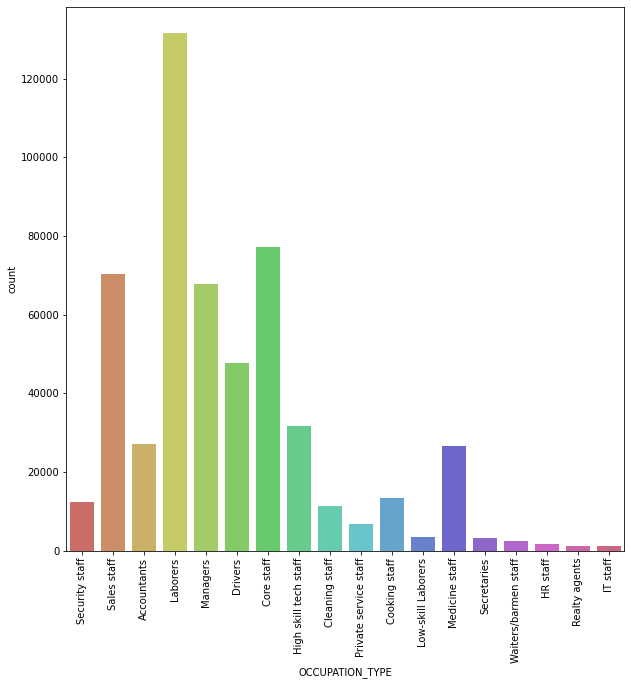

In [59]:
# Plotting count of Occuption types

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "OCCUPATION_TYPE", data = data, palette = "hls")
plt.xticks(rotation=90)
plt.show()

#### 3.1.1.9 STATUS

In [60]:
# Number of null values and unique values in STATUS

print("Null Value in STATUS :", data['STATUS'].isnull().sum())
print("Number of Unique Values in STATUS :", data['STATUS'].nunique())

Null Value in STATUS : 0
Number of Unique Values in STATUS : 8


In [61]:
data['STATUS'].unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [62]:
print("Count of Status :\n", data['STATUS'].value_counts())

Count of Status :
 C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64


In [63]:
# Percentage of Status

countC = len(data[data.STATUS == 'C'])
count0 = len(data[data.STATUS == '0'])
countX = len(data[data.STATUS == 'X'])
count1 = len(data[data.STATUS == '1'])
count2 = len(data[data.STATUS == '2'])
count3 = len(data[data.STATUS == '3'])
count4 = len(data[data.STATUS == '4'])
count5 = len(data[data.STATUS == '5'])
countNull = len(data[data.STATUS.isnull()])

print("Percentage of C: {:.2f}%".format((countC / (len(data.STATUS)))*100))
print("Percentage of 0: {:.2f}%".format((count0 / (len(data.STATUS)))*100))
print("Percentage of X: {:.2f}%".format((countX / (len(data.STATUS)))*100))
print("Percentage of 1: {:.2f}%".format((count1 / (len(data.STATUS)))*100))
print("Percentage of 2: {:.2f}%".format((count2 / (len(data.STATUS)))*100))
print("Percentage of 3: {:.2f}%".format((count3 / (len(data.STATUS)))*100))
print("Percentage of 4: {:.2f}%".format((count4 / (len(data.STATUS)))*100))
print("Percentage of 5: {:.2f}%".format((count5 / (len(data.STATUS)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.NAME_FAMILY_STATUS)))*100))

Percentage of C: 42.37%
Percentage of 0: 37.37%
Percentage of X: 18.77%
Percentage of 1: 1.12%
Percentage of 2: 0.10%
Percentage of 3: 0.04%
Percentage of 4: 0.03%
Percentage of 5: 0.20%
Missing values percentage: 0.00%


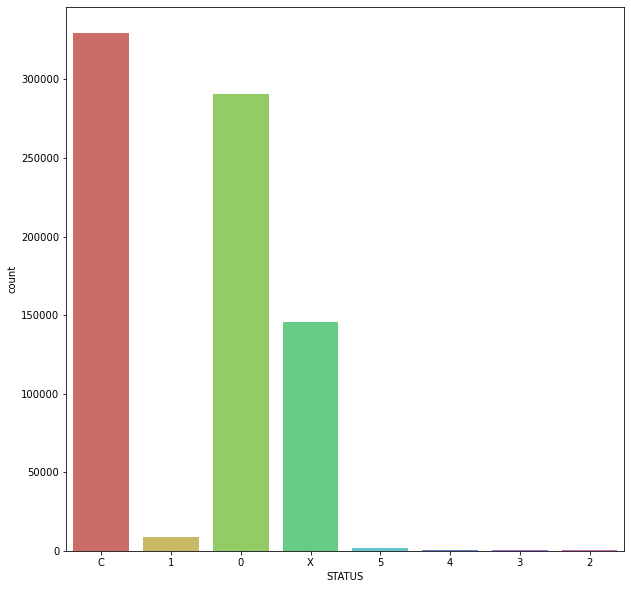

In [64]:
# Plotting count of Status

fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = "STATUS", data = data, palette = "hls")
plt.show()

### 3.1.2 Numerical Variables in Data

In [65]:
data[data_num].describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


#### 3.1.2.1 ID

In [66]:
# Number of null values and unique values in ID

print("Null Value in ID :", data['ID'].isnull().sum())
print("Number of Unique Values in ID :", data['ID'].nunique())

Null Value in ID : 0
Number of Unique Values in ID : 36457


In [67]:
data["ID"].describe()

count    7.777150e+05
mean     5.078743e+06
std      4.180442e+04
min      5.008804e+06
25%      5.044568e+06
50%      5.069530e+06
75%      5.115551e+06
max      5.150487e+06
Name: ID, dtype: float64

In [68]:
data["ID"].value_counts()

5090630    61
5148524    61
5066707    61
5061848    61
5118380    61
           ..
5024557     1
5062311     1
5024365     1
5024364     1
5041568     1
Name: ID, Length: 36457, dtype: int64

#### 3.1.2.2 CNT_CHILDREN

In [69]:
# Number of null values and unique values in CNT_CHILDREN

print("Null Value in CNT_CHILDREN :", data['CNT_CHILDREN'].isnull().sum())
print("Number of Unique Values in CNT_CHILDREN :", data['CNT_CHILDREN'].nunique())

Null Value in CNT_CHILDREN : 0
Number of Unique Values in CNT_CHILDREN : 9


In [70]:
data["CNT_CHILDREN"].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [71]:
data["CNT_CHILDREN"].value_counts()

0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

Text(0.5, 17.200000000000003, 'CNT_CHILDREN')

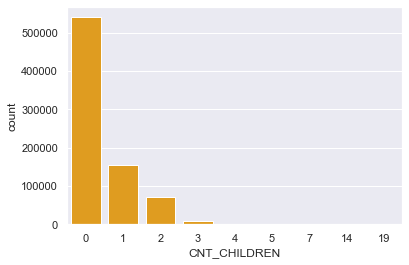

In [72]:
# Creating Countplot of CNT_CHILDREN

sns.set(style="darkgrid")
sns.countplot(x="CNT_CHILDREN", data = data, color='orange')
ax.set_title('Countplot of CNT_CHILDREN')
ax.set_xlabel('CNT_CHILDREN')

Text(17.200000000000003, 0.5, 'CNT_CHILDREN')

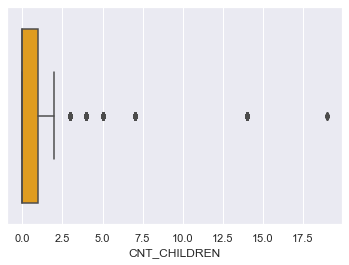

In [73]:
# Creating Box plot of CNT_CHILDREN

sns.set(style="darkgrid")
sns.boxplot(x="CNT_CHILDREN", data = data, color='orange')
ax.set_title('Boxplot of CNT_CHILDREN')
ax.set_xlabel('Count')
ax.set_ylabel('CNT_CHILDREN')

#### 3.1.2.3 AMT_INCOME_TOTAL

In [74]:
# Number of null values and unique values in AMT_INCOME_TOTAL

print("Null Value in AMT_INCOME_TOTAL :", data['AMT_INCOME_TOTAL'].isnull().sum())
print("Number of Unique Values in AMT_INCOME_TOTAL :", data['AMT_INCOME_TOTAL'].nunique())

Null Value in AMT_INCOME_TOTAL : 0
Number of Unique Values in AMT_INCOME_TOTAL : 265


In [75]:
data["AMT_INCOME_TOTAL"].describe()

count    7.777150e+05
mean     1.885348e+05
std      1.016225e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

Text(17.200000000000003, 0.5, 'AMT_INCOME_TOTAL')

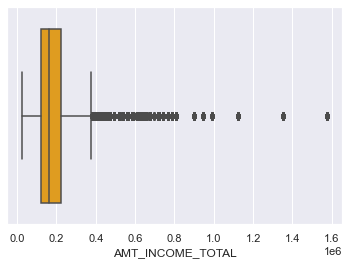

In [76]:
# Creating Box plot of AMT_INCOME_TOTAL

sns.set(style="darkgrid")
sns.boxplot(x="AMT_INCOME_TOTAL", data = data, color='orange')
ax.set_title('Boxplot of AMT_INCOME_TOTAL')
ax.set_xlabel('Count')
ax.set_ylabel('AMT_INCOME_TOTAL')

#### 3.1.2.4 DAYS_BIRTH

In [77]:
# Number of null values and unique values in DAYS_BIRTH

print("Null Value in DAYS_BIRTH :", data['DAYS_BIRTH'].isnull().sum())
print("Number of Unique Values in DAYS_BIRTH :", data['DAYS_BIRTH'].nunique())

Null Value in DAYS_BIRTH : 0
Number of Unique Values in DAYS_BIRTH : 7183


In [78]:
data["DAYS_BIRTH"].describe()

count    777715.000000
mean     -16124.937046
std        4104.304018
min      -25152.000000
25%      -19453.000000
50%      -15760.000000
75%      -12716.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [79]:
data["DAYS_BIRTH"].value_counts()

-14667    1018
-15140     928
-15675     835
-15519     799
-16995     799
          ... 
-18983       1
-10119       1
-19526       1
-7489        1
-9177        1
Name: DAYS_BIRTH, Length: 7183, dtype: int64

Text(17.200000000000003, 0.5, 'DAYS_BIRTH')

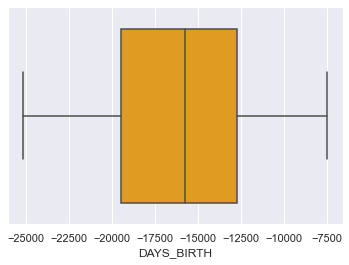

In [80]:
# Creating Box plot of DAYS_BIRTH

sns.set(style="darkgrid")
sns.boxplot(x="DAYS_BIRTH", data = data, color='orange')
ax.set_title('Boxplot of DAYS_BIRTH')
ax.set_xlabel('Count')
ax.set_ylabel('DAYS_BIRTH')

#### 3.1.2.5 DAYS_EMPLOYED

In [81]:
# Number of null values and unique values in DAYS_EMPLOYED

print("Null Value in DAYS_EMPLOYED :", data['DAYS_EMPLOYED'].isnull().sum())
print("Number of Unique Values in DAYS_EMPLOYED :", data['DAYS_EMPLOYED'].nunique())

Null Value in DAYS_EMPLOYED : 0
Number of Unique Values in DAYS_EMPLOYED : 3640


In [82]:
data["DAYS_EMPLOYED"].describe()

count    777715.000000
mean      57775.825016
std      136471.735391
min      -15713.000000
25%       -3292.000000
50%       -1682.000000
75%        -431.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [83]:
data["DAYS_EMPLOYED"].value_counts()

 365243    127972
-1751        1601
-1539        1545
-401         1498
-2531        1319
            ...  
-3294           1
-3891           1
-7049           1
-7765           1
-2848           1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

Text(17.200000000000003, 0.5, 'DAYS_EMPLOYED')

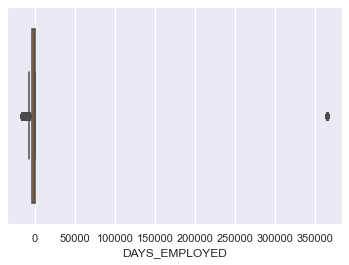

In [84]:
# Creating Box plot of DAYS_EMPLOYED

sns.set(style="darkgrid")
sns.boxplot(x="DAYS_EMPLOYED", data = data, color='orange')
ax.set_title('Boxplot of DAYS_EMPLOYED')
ax.set_xlabel('Count')
ax.set_ylabel('DAYS_EMPLOYED')

#### 3.1.2.6 FLAG_MOBIL

In [85]:
# Number of null values and unique values in FLAG_MOBIL

print("Null Value in FLAG_MOBIL :", data['FLAG_MOBIL'].isnull().sum())
print("Number of Unique Values in FLAG_MOBIL :", data['FLAG_MOBIL'].nunique())

Null Value in FLAG_MOBIL : 0
Number of Unique Values in FLAG_MOBIL : 1


In [86]:
data["FLAG_MOBIL"].describe()

count    777715.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FLAG_MOBIL, dtype: float64

In [87]:
data["FLAG_MOBIL"].value_counts()

1    777715
Name: FLAG_MOBIL, dtype: int64

#### 3.1.2.7 FLAG_WORK_PHONE

In [88]:
# Number of null values and unique values in FLAG_WORK_PHONE

print("Null Value in FLAG_WORK_PHONE :", data['FLAG_WORK_PHONE'].isnull().sum())
print("Number of Unique Values in FLAG_WORK_PHONE :", data['FLAG_WORK_PHONE'].nunique())

Null Value in FLAG_WORK_PHONE : 0
Number of Unique Values in FLAG_WORK_PHONE : 2


In [89]:
data["FLAG_WORK_PHONE"].describe()

count    777715.000000
mean          0.231818
std           0.421993
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64

In [90]:
data["FLAG_WORK_PHONE"].value_counts()

0    597427
1    180288
Name: FLAG_WORK_PHONE, dtype: int64

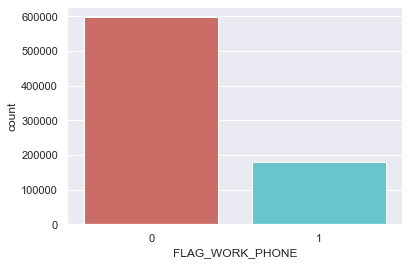

In [91]:
# Creating Countplot of FLAG_WORK_PHONE

sns.countplot(x = "FLAG_WORK_PHONE", data = data, palette = "hls")
plt.show()

#### 3.1.2.8 FLAG_PHONE

In [92]:
# Number of null values and unique values in FLAG_PHONE

print("Null Value in FLAG_PHONE :", data['FLAG_PHONE'].isnull().sum())
print("Number of Unique Values in FLAG_PHONE :", data['FLAG_PHONE'].nunique())

Null Value in FLAG_PHONE : 0
Number of Unique Values in FLAG_PHONE : 2


In [93]:
data["FLAG_PHONE"].describe()

count    777715.000000
mean          0.300965
std           0.458678
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64

In [94]:
data["FLAG_PHONE"].value_counts()

0    543650
1    234065
Name: FLAG_PHONE, dtype: int64

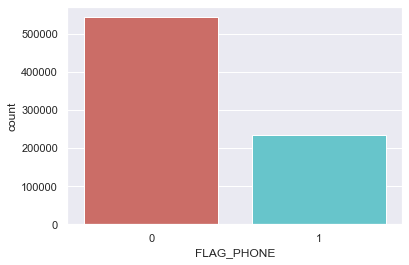

In [95]:
# Creating Countplot of FLAG_PHONE

sns.countplot(x = "FLAG_PHONE", data = data, palette = "hls")
plt.show()

#### 3.1.2.9 FLAG_EMAIL

In [96]:
# Number of null values and unique values in FLAG_EMAIL

print("Null Value in FLAG_EMAIL :", data['FLAG_EMAIL'].isnull().sum())
print("Number of Unique Values in FLAG_EMAIL :", data['FLAG_EMAIL'].nunique())

Null Value in FLAG_EMAIL : 0
Number of Unique Values in FLAG_EMAIL : 2


In [97]:
data["FLAG_EMAIL"].describe()

count    777715.000000
mean          0.091675
std           0.288567
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64

In [98]:
data["FLAG_EMAIL"].value_counts()

0    706418
1     71297
Name: FLAG_EMAIL, dtype: int64

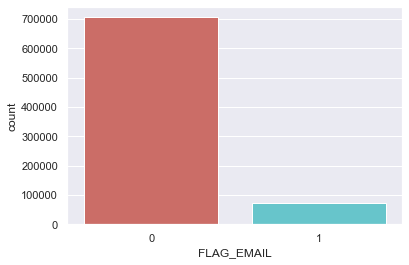

In [99]:
# Creating Countplot of FLAG_EMAIL

sns.countplot(x = "FLAG_EMAIL", data = data, palette = "hls")
plt.show()

#### 3.1.2.10 CNT_FAM_MEMBERS

In [100]:
# Number of null values and unique values in CNT_FAM_MEMBERS

print("Null Value in CNT_FAM_MEMBERS :", data['CNT_FAM_MEMBERS'].isnull().sum())
print("Number of Unique Values in CNT_FAM_MEMBERS :", data['CNT_FAM_MEMBERS'].nunique())

Null Value in CNT_FAM_MEMBERS : 0
Number of Unique Values in CNT_FAM_MEMBERS : 10


In [101]:
data["CNT_FAM_MEMBERS"].describe()

count    777715.000000
mean          2.208837
std           0.907380
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [102]:
data["CNT_FAM_MEMBERS"].value_counts()

2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

Text(17.200000000000003, 0.5, 'CNT_FAM_MEMBERS')

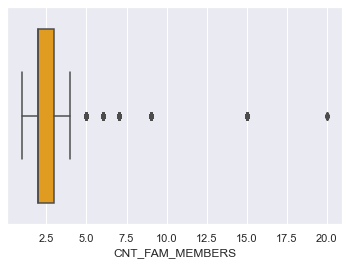

In [103]:
# Creating Box plot of CNT_FAM_MEMBERS

sns.set(style="darkgrid")
sns.boxplot(x="CNT_FAM_MEMBERS", data = data, color='orange')
ax.set_title('Boxplot of CNT_FAM_MEMBERS')
ax.set_xlabel('Count')
ax.set_ylabel('CNT_FAM_MEMBERS')

#### 3.1.2.11 MONTHS_BALANCE

In [104]:
# Number of null values and unique values in MONTHS_BALANCE

print("Null Value in MONTHS_BALANCE :", data['MONTHS_BALANCE'].isnull().sum())
print("Number of Unique Values in MONTHS_BALANCE :", data['MONTHS_BALANCE'].nunique())

Null Value in MONTHS_BALANCE : 0
Number of Unique Values in MONTHS_BALANCE : 61


In [105]:
data["MONTHS_BALANCE"].describe()

count    777715.000000
mean        -19.373564
std          14.082208
min         -60.000000
25%         -29.000000
50%         -17.000000
75%          -8.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

In [106]:
data["MONTHS_BALANCE"].value_counts()

-1     24963
-2     24871
 0     24672
-3     24644
-4     24274
       ...  
-56     1588
-57     1253
-58      955
-59      627
-60      321
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [107]:
# Checking correlation between columns

data.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
ID,1.000000,0.026269,-0.027597,0.042020,-0.025322,NaN,0.084800,0.006346,-0.056083,0.027375,0.005007
CNT_CHILDREN,0.026269,1.000000,0.039304,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079,0.000913
AMT_INCOME_TOTAL,-0.027597,0.039304,1.000000,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379,0.001831
DAYS_BIRTH,0.042020,0.356177,0.081231,1.000000,-0.608856,NaN,0.180658,-0.026717,0.100945,0.327750,0.035756
DAYS_EMPLOYED,-0.025322,-0.228945,-0.180674,-0.608856,1.000000,NaN,-0.243677,-0.013817,-0.082474,-0.227645,-0.004222
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.084800,0.042226,-0.021229,0.180658,-0.243677,NaN,1.000000,0.312552,-0.037991,0.060183,0.001529
FLAG_PHONE,0.006346,-0.018882,0.018687,-0.026717,-0.013817,NaN,0.312552,1.000000,0.011901,-0.007824,-0.005120
FLAG_EMAIL,-0.056083,0.015726,0.085776,0.100945,-0.082474,NaN,-0.037991,0.011901,1.000000,0.012540,0.005288
CNT_FAM_MEMBERS,0.027375,0.892079,0.031379,0.327750,-0.227645,NaN,0.060183,-0.007824,0.012540,1.000000,-0.006276


# 4 Data Preprocessing

## 4.1 Drop unecessary feature

In [108]:
# ID column is not required for model preparation so we will drop the that column

data.drop("ID", inplace = True, axis = 1)

In [109]:
#FLAG_MOBIL column is not correlated to any feature so we will drop the that column

data.drop("FLAG_MOBIL", inplace = True, axis = 1)

## 4.2 Treatment of Null Values

In [110]:
# Checking which column has null values

data.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [111]:
# Only one column "OCCUPATION_TYPE" has null values

In [112]:
# Changing all the null values with "Other"

data['OCCUPATION_TYPE'].fillna('Other',inplace = True)

In [113]:
# Re-checking for any null values

data.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

## 4.3 Encoding

In [114]:
data_cat

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'STATUS']

In [115]:
# CODE_GENDER

data['CODE_GENDER'] = data['CODE_GENDER'].apply(lambda x:1 if x == "M" else 0)
print(data['CODE_GENDER'])
print(data['CODE_GENDER'].value_counts())

0         1
1         1
2         1
3         1
4         1
         ..
777710    1
777711    1
777712    1
777713    1
777714    1
Name: CODE_GENDER, Length: 777715, dtype: int64
0    518851
1    258864
Name: CODE_GENDER, dtype: int64


In [116]:
# FLAG_OWN_CAR

data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].apply(lambda x:1 if x == "Y" else 0)
print(data['FLAG_OWN_CAR'])
print(data['FLAG_OWN_CAR'].value_counts())

0         1
1         1
2         1
3         1
4         1
         ..
777710    0
777711    0
777712    0
777713    0
777714    0
Name: FLAG_OWN_CAR, Length: 777715, dtype: int64
0    473355
1    304360
Name: FLAG_OWN_CAR, dtype: int64


In [117]:
# FLAG_OWN_REALTY

data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].apply(lambda x:1 if x == "Y" else 0)
print(data['FLAG_OWN_REALTY'])
print(data['FLAG_OWN_REALTY'].value_counts())

0         1
1         1
2         1
3         1
4         1
         ..
777710    1
777711    1
777712    1
777713    1
777714    1
Name: FLAG_OWN_REALTY, Length: 777715, dtype: int64
1    512948
0    264767
Name: FLAG_OWN_REALTY, dtype: int64


In [118]:
#This function takes no of days and convert it into their datetime format

def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday           

# A function to calculate age of the employee

def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [119]:
# DAYS_BIRTH

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(Date_of_Birth)
data['DAYS_BIRTH'].head()

0    1989-12-28
1    1989-12-28
2    1989-12-28
3    1989-12-28
4    1989-12-28
Name: DAYS_BIRTH, dtype: object

In [120]:
# Converting Date format to number of years

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(AGE)
data['DAYS_BIRTH']

0         33
1         33
2         33
3         33
4         33
          ..
777710    25
777711    25
777712    25
777713    25
777714    25
Name: DAYS_BIRTH, Length: 777715, dtype: int64

In [121]:
#This Function takes value of colunn Days of Employed and convert it into datetime format

def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return employed_date

In [122]:
# DAYS_EMPLOYED

data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(Employed_day)
data['DAYS_EMPLOYED'].head()

0    2010-06-04
1    2010-06-04
2    2010-06-04
3    2010-06-04
4    2010-06-04
Name: DAYS_EMPLOYED, dtype: object

In [123]:
# Converting Date format to number of years

data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(AGE)
data['DAYS_EMPLOYED']

0         12
1         12
2         12
3         12
4         12
          ..
777710     3
777711     3
777712     3
777713     3
777714     3
Name: DAYS_EMPLOYED, Length: 777715, dtype: int64

In [124]:
# Renaming DAYS_BIRTH and DAYS_EMPLOYED to AGE and YEARS_WORKED

data.rename(columns = {'DAYS_BIRTH':'AGE'}, inplace = True)
data.rename(columns = {'DAYS_EMPLOYED':'YEARS_WORKED'}, inplace = True)

In [125]:
# STATUS

data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [126]:
data.loc[data['STATUS'] == 'C','STATUS']=6
data.loc[data['STATUS'] == 'X','STATUS']=7

In [127]:
data['STATUS'] = data['STATUS'].astype(float)

In [128]:
# Defining Target variable
# 1 represents Not Risky and the person will get Credit Card
# 0 represents Risky and the person will not get Credit Card

def solve(state):
    target=''
    if state in (2,3,4,5):
        target = 0 #Risky
    else :
        target = 1 #Not Risky
        
    return target

In [129]:
# Creating Target Variable

data['Target'] = data['STATUS'].apply(solve)

In [130]:
data['Target'].value_counts()

1    774887
0      2828
Name: Target, dtype: int64

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int64  
 1   FLAG_OWN_CAR         777715 non-null  int64  
 2   FLAG_OWN_REALTY      777715 non-null  int64  
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   AGE                  777715 non-null  int64  
 10  YEARS_WORKED         777715 non-null  int64  
 11  FLAG_WORK_PHONE      777715 non-null  int64  
 12  FLAG_PHONE           777715 non-null  int64  
 13  FLAG_EMAIL           777715 non-null  int64  
 14  OCCUPATION_TYPE      777715 non-null  object 
 15  CNT_FAM_MEMBERS  

In [132]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,0,6.0,1
1,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-1,6.0,1
2,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-2,6.0,1
3,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-3,6.0,1
4,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-4,6.0,1


## 4.4 Remove Outliers

In [133]:
# Defining Outliers Function

def outliers(df,col):
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        LW=df[col].quantile(0.25)-(IQR*1.5)
        UW=df[col].quantile(0.75)+(IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))
        df[col]=np.where(df[col]<LW,df[col].mean(),df[col])
        df[col]=np.where(df[col]>UW,df[col].mean(),df[col])

### 4.4.1 CNT_CHILDREN

Text(17.200000000000003, 0.5, 'Count')

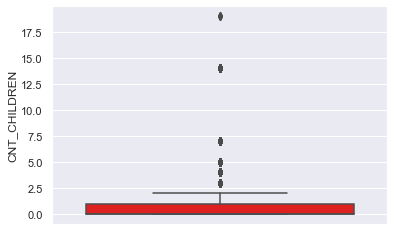

In [134]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="CNT_CHILDREN", color='red')
ax.set_title('Boxplot of CNT_CHILDREN')
ax.set_xlabel('CNT_CHILDREN')
ax.set_ylabel('Count')

In [135]:
data["CNT_CHILDREN"].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [136]:
# Removing Outliers

outliers(data,'CNT_CHILDREN')

For feature CNT_CHILDREN Lower Whisker is -1.5 and Upper Whisker is 2.5 



Text(17.200000000000003, 0.5, 'Count')

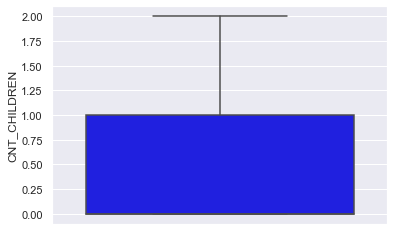

In [137]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="CNT_CHILDREN", color='blue')
ax.set_title('Boxplot of CNT_CHILDREN')
ax.set_xlabel('CNT_CHILDREN')
ax.set_ylabel('Count')

### 4.4.2 AMT_INCOME_TOTAL

Text(17.200000000000003, 0.5, 'Count')

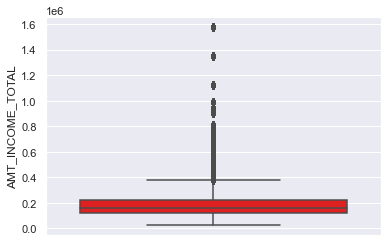

In [138]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="AMT_INCOME_TOTAL", color='red')
ax.set_title('Boxplot of AMT_INCOME_TOTAL')
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Count')

In [139]:
data["AMT_INCOME_TOTAL"].describe()

count    7.777150e+05
mean     1.885348e+05
std      1.016225e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [140]:
# Removing Outliers

outliers(data,"AMT_INCOME_TOTAL")

For feature AMT_INCOME_TOTAL Lower Whisker is -33750.0 and Upper Whisker is 380250.0 



Text(17.200000000000003, 0.5, 'Count')

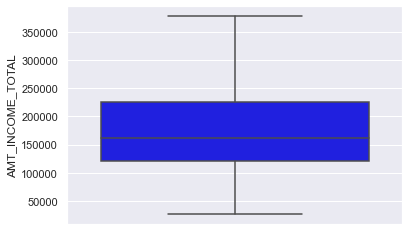

In [141]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="AMT_INCOME_TOTAL", color='blue')
ax.set_title('Boxplot of AMT_INCOME_TOTAL')
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Count')

### 4.4.3 AGE

Text(17.200000000000003, 0.5, 'Count')

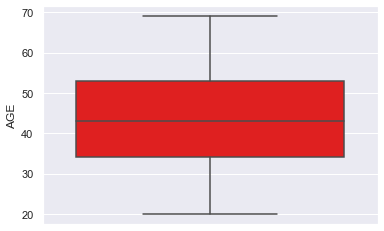

In [142]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="AGE", color='red')
ax.set_title('Boxplot of AGE')
ax.set_xlabel('AGE')
ax.set_ylabel('Count')

### 4.4.4 YEARS_WORKED

Text(17.200000000000003, 0.5, 'Count')

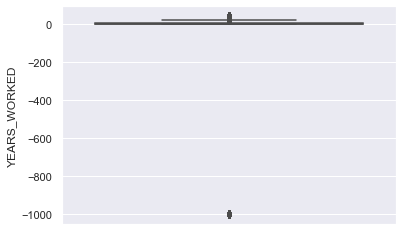

In [143]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="YEARS_WORKED", color='red')
ax.set_title('Boxplot of YEARS_WORKED')
ax.set_xlabel('YEARS_WORKED')
ax.set_ylabel('Count')

In [144]:
# Since the outliers are very far away, these cannot be removed by mean.
# So we will treat these outliers by Quantile values of the data

In [145]:
def outliers2(df1,col):
        IQR=df1[col].quantile(0.75)-df1[col].quantile(0.25)
        LW=df1[col].quantile(0.25)-(IQR*1.5)
        UW=df1[col].quantile(0.75)+(IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))
        df1[col]=np.where(df1[col]<LW,df1[col].quantile(0.25),df1[col])
        df1[col]=np.where(df1[col]>UW,df1[col].quantile(0.75),df1[col])

In [146]:
# Removing outliers

outliers2(data, "YEARS_WORKED")

For feature YEARS_WORKED Lower Whisker is -11.0 and Upper Whisker is 21.0 



Text(17.200000000000003, 0.5, 'Count')

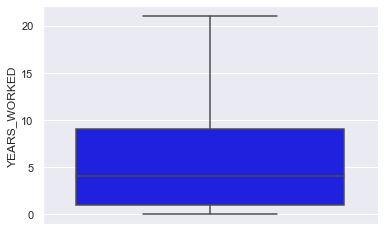

In [147]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="YEARS_WORKED", color='blue')
ax.set_title('Boxplot of YEARS_WORKED')
ax.set_xlabel('YEARS_WORKED')
ax.set_ylabel('Count')

### 4.4.5 CNT_FAM_MEMBERS

Text(17.200000000000003, 0.5, 'Count')

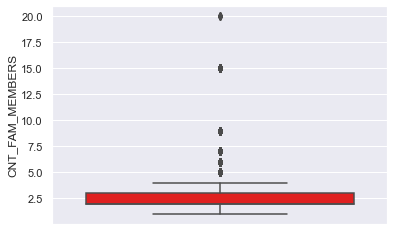

In [148]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="CNT_FAM_MEMBERS", color='red')
ax.set_title('Boxplot of CNT_FAM_MEMBERS')
ax.set_xlabel('CNT_FAM_MEMBERS')
ax.set_ylabel('Count')

In [149]:
# Removing outliers

outliers(data, "CNT_FAM_MEMBERS")

For feature CNT_FAM_MEMBERS Lower Whisker is 0.5 and Upper Whisker is 4.5 



Text(17.200000000000003, 0.5, 'Count')

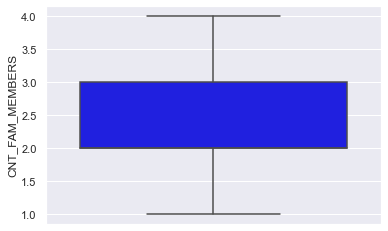

In [150]:
# Making Box plot to check presence of outliers

sns.set(style="darkgrid")
sns.boxplot(data = data, y="CNT_FAM_MEMBERS", color='blue')
ax.set_title('Boxplot of CNT_FAM_MEMBERS')
ax.set_xlabel('CNT_FAM_MEMBERS')
ax.set_ylabel('Count')

## 4.5 Correlation Analysis

In [151]:
data.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
CODE_GENDER,1.000000,0.368554,-0.055791,0.107142,0.226020,-0.203779,0.000759,0.059027,-0.029471,-0.011710,0.141132,0.013635,0.005773,-0.011863
FLAG_OWN_CAR,0.368554,1.000000,-0.017764,0.106180,0.222652,-0.161887,0.044486,0.019654,-0.014249,0.029040,0.155635,-0.003142,0.000631,-0.000930
FLAG_OWN_REALTY,-0.055791,-0.017764,1.000000,-0.021035,0.024014,0.129202,-0.038784,-0.210804,-0.061221,0.054065,-0.022140,-0.008977,-0.002500,0.001228
CNT_CHILDREN,0.107142,0.106180,-0.021035,1.000000,0.045819,-0.375506,0.076007,0.045044,-0.020226,0.021301,0.865896,0.000788,-0.001086,0.000222
AMT_INCOME_TOTAL,0.226020,0.222652,0.024014,0.045819,1.000000,-0.117718,0.103147,-0.034556,-0.009202,0.078386,0.031036,-0.002488,-0.005719,0.002576
AGE,-0.203779,-0.161887,0.129202,-0.375506,-0.117718,1.000000,-0.079829,-0.179949,0.027354,-0.101037,-0.331965,-0.035845,-0.004911,-0.005288
YEARS_WORKED,0.000759,0.044486,-0.038784,0.076007,0.103147,-0.079829,1.000000,0.106828,0.028267,-0.001225,0.094297,-0.035226,0.004061,0.018460
FLAG_WORK_PHONE,0.059027,0.019654,-0.210804,0.045044,-0.034556,-0.179949,0.106828,1.000000,0.312552,-0.037991,0.062780,0.001529,0.010512,-0.007412
FLAG_PHONE,-0.029471,-0.014249,-0.061221,-0.020226,-0.009202,0.027354,0.028267,0.312552,1.000000,0.011901,-0.006529,-0.005120,-0.000747,-0.007213
FLAG_EMAIL,-0.011710,0.029040,0.054065,0.021301,0.078386,-0.101037,-0.001225,-0.037991,0.011901,1.000000,0.015681,0.005288,-0.012077,0.003054


<AxesSubplot:>

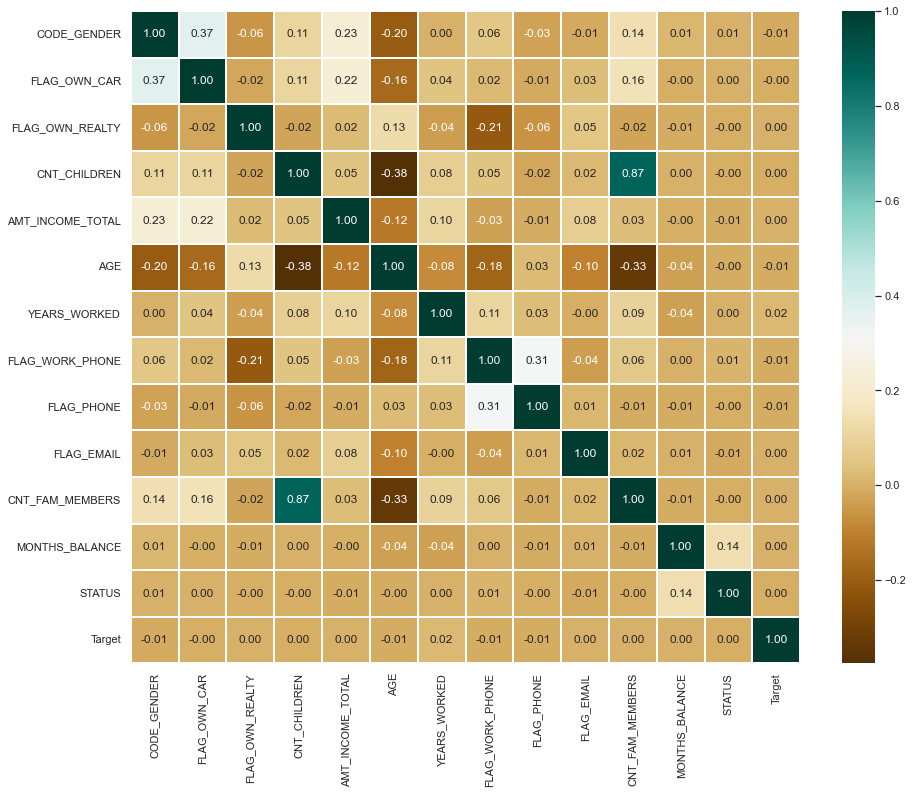

In [152]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'BrBG', linewidths = 2)

## 4.6 Feature Separating

In [153]:
# Distributing data into 2 groups X and Y
# X contains all the Features
# Y contains the Target Variable

X = data.drop(["Target"], axis=1)
y = data["Target"]

## 4.7 Feature Separating

In [154]:
# Splitting Data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [155]:
X_train.shape, X_test.shape

((622172, 18), (155543, 18))

## 4.8 Creating Dummies

In [156]:
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
print('There are {} categorical variables in Train Data \n'.format(len(categorical)))
print('Categorical Variables are :', categorical)

There are 5 categorical variables in Train Data 

Categorical Variables are : ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [157]:
numerical = [var for var in X_train.columns if X_train[var].dtype != 'O']
print('There are {} categorical variables in Train Data \n'.format(len(numerical)))
print('Categorical Variables are :', numerical)

There are 13 categorical variables in Train Data 

Categorical Variables are : ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_WORKED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']


In [158]:
X_train = pd.concat([X_train[numerical],
                     pd.get_dummies(X_train.NAME_INCOME_TYPE), 
                     pd.get_dummies(X_train.NAME_EDUCATION_TYPE),
                     pd.get_dummies(X_train.NAME_FAMILY_STATUS),
                     pd.get_dummies(X_train.NAME_HOUSING_TYPE),
                     pd.get_dummies(X_train.OCCUPATION_TYPE)], axis=1)

In [159]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,Low-skill Laborers,Managers,Medicine staff,Other,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
693166,0,0,0,0.0,157500.0,47,8.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
474525,1,1,1,2.0,247500.0,47,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614458,0,0,1,0.0,81000.0,53,8.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
261954,0,0,1,0.0,45000.0,43,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
151635,0,1,1,0.0,112500.0,54,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.NAME_INCOME_TYPE), 
                     pd.get_dummies(X_test.NAME_EDUCATION_TYPE),
                     pd.get_dummies(X_test.NAME_FAMILY_STATUS),
                     pd.get_dummies(X_test.NAME_HOUSING_TYPE),
                     pd.get_dummies(X_test.OCCUPATION_TYPE)], axis=1)

In [161]:
X_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_WORKED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,Low-skill Laborers,Managers,Medicine staff,Other,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
719660,1,1,0,2.0,360000.0,44,7.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
697010,0,0,0,0.0,99000.0,59,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
441561,1,1,1,0.0,270000.0,58,4.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
131612,0,0,1,0.0,202500.0,64,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
582915,0,0,0,0.0,135000.0,41,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4.9 Data Normalization

In [162]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# 5 Models

## 5.1 Logistic Regression

In [165]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

LR accuracy: 99.65%


## 5.2 Decision Tree

In [164]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

y_pred = DTclassifier.predict(X_test)    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))    
    
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00    154995

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

[[   548      0]
 [     0 154995]]
Decision Tree Accuracy: 100.00%


## 5.3 K-Nearest Neighbour (KNN)

In [173]:
scoreListknn = []
for i in range(2,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

KNN best accuracy: 99.94%


## 5.4 Random Forest

In [174]:
scoreListRF = []
for i in range(2,21):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  99.65%


# 6 Model Comparison

In [175]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,100.000000
1,K Neighbors,99.940852
0,Logistic Regression,99.647686
3,Random Forest,99.647686
